In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression

from lab1 import SSE

In [50]:
X = np.load('./data3_x.npy')
y = np.load('./data3_y.npy')

alphas=np.arange(10e-3, 10, 10e-3)

#alphas=np.arange(0.1, 40, 0.1)

In [51]:
ridge_model = Ridge(max_iter=10000)
lasso_model = Lasso(max_iter=10000)


ridge_coefficients = None
lasso_coefficients = None


for alpha in alphas:
    ridge_model.alpha = alpha
    lasso_model.alpha = alpha
    
    ridge_model.fit(X, y)
    lasso_model.fit(X, y)
    
    ridge_coef = ridge_model.coef_
    lasso_coef = np.expand_dims(lasso_model.coef_, 0)

    if type(ridge_coefficients) != np.ndarray:
        ridge_coefficients = ridge_coef
        lasso_coefficients = lasso_coef
    else:
        ridge_coefficients = np.concatenate((ridge_coefficients, ridge_coef), axis=0)
        lasso_coefficients = np.concatenate((lasso_coefficients, lasso_coef), axis=0)
        
        


In [52]:
LS_model = LinearRegression()
LS_model.fit(X, y)

c1 = np.ones(len(alphas)) * LS_model.coef_[0][0]
c2 = np.ones(len(alphas)) * LS_model.coef_[0][1]
c3 = np.ones(len(alphas)) * LS_model.coef_[0][2]

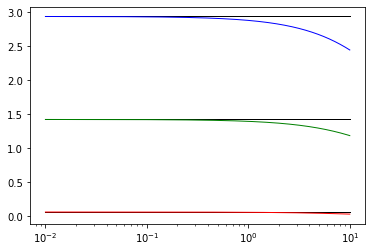

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(alphas, c1, color='black', lw=1)
ax.plot(alphas, c2, color='black', lw=1)
ax.plot(alphas, c3, color='black', lw=1)

ax.plot(alphas, ridge_coefficients[:,0], color='blue', lw=1)
ax.plot(alphas, ridge_coefficients[:,1], color='red', lw=1)
ax.plot(alphas, ridge_coefficients[:,2], color='green', lw=1)



#ax.plot(1)

ax.set_xscale('log')
plt.show()

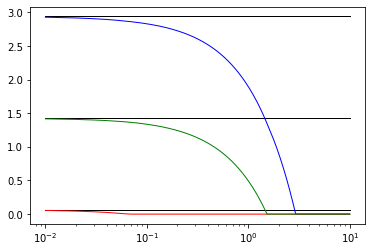

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(alphas, c1, color='black', lw=1)
ax.plot(alphas, c2, color='black', lw=1)
ax.plot(alphas, c3, color='black', lw=1)

ax.plot(alphas, lasso_coefficients[:,0], color='blue', lw=1)
ax.plot(alphas, lasso_coefficients[:,1], color='red', lw=1)
ax.plot(alphas, lasso_coefficients[:,2], color='green', lw=1)

ax.set_xscale('log')
plt.show()

[array([-0.52579294,  0.5876299 ,  0.12761687,  1.48853077,  1.31161327,
       -1.16318983,  0.36239049, -0.20479701,  0.72835299, -0.84746104,
        0.52902512, -1.35873533,  0.40293651,  1.5115724 ,  1.83800886,
        0.28738909,  0.15958601,  0.05179601, -0.78805435,  0.71817088,
       -1.25632119,  1.46284454, -0.55858836, -0.5616171 ,  1.47064778,
        0.34864809, -1.63273214, -0.25360957,  0.46123739, -1.00418681,
       -1.21191026,  2.19631203,  1.97440642,  0.01359824, -0.265847  ,
        1.06075782, -0.62706048, -1.1197204 , -0.5644532 , -1.7171034 ,
        0.18615409,  0.19975738,  0.94612064,  0.14595235, -1.52241679,
       -1.61790046,  0.57104106, -1.24127113, -0.49260498,  0.6775793 ])]


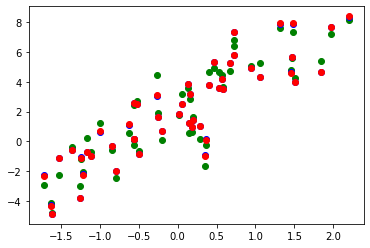

In [72]:
l = np.linspace(0, X.shape[0]-1, X.shape[0])
l = [X[:,0]]
print(l)

lasso_model.alpha = 0.01
lasso_model.fit(X, y)
lasso_values = lasso_model.predict(X)

LS_model.fit(X, y)
LS_values = LS_model.predict(X)[:,0]

plt.scatter(l, y, color="green")
plt.scatter(l, lasso_values, color="blue")
plt.scatter(l, LS_values, color="red")

#plt.scatter(l, y, color="red")




Lasso sse: 14.996918569435612
Least Squares sse: 14.982010067652942


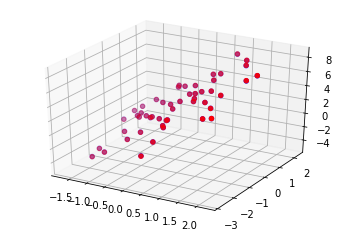

In [73]:

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X[:,0], X[:,2], y, color="green")

ax.scatter(X[:,0], X[:,2], lasso_values, color="blue")

ax.scatter(X[:,0], X[:,2], LS_values, color="red")

print("Lasso sse:", SSE(y, lasso_values))
print("Least Squares sse:", SSE(y, LS_values))


